# Architecture Hotspots

We are looking for hotspots on the project.

```MATCH
   (class:Type),
   (package:Package)-[:CONTAINS]->(class)
WHERE
   package.fileName CONTAINS 'junit'
OPTIONAL MATCH
   (class)-[:DECLARES]->(method:Method)
RETURN DISTINCT
   package.fileName AS package,
   class.name AS class,
   class.fileName AS fileName,
   class.fqn AS fullyQualifiedName,
   class.sourceFileName AS sourceFileName,
   class.javaVersion AS javaVersion,
   class.md5 AS md5,
   method.name AS method,
   method.signature AS methodSignature,
   method.firstLineNumber AS firstLine,
   method.lastLineNumber AS lastLine,
   method.effectiveLineCount AS lines,
   method.cyclomaticComplexity AS cyclomaticComplexity,
   class.valid AS validClass,
   class.visibility AS classVisibility,
   method.visibility AS methodVisibility
ORDER BY
   package,
   class,
   method```

# Setting Up

In [1]:
import pandas as pd
import calendar

history = pd.read_json("../datasets/git_history_junit4.gz", encoding='utf-8-sig')
classes = pd.read_json("../datasets/class_structure_junit4.gz", encoding='utf-8-sig')

# To stop pandas from removing data
history = history.fillna("")
classes = classes.fillna("")

# Exploring Data

In [2]:
history

,sha,date,time,author,author_email,author_id,commiter,message,modificationKind,file,fileType,class,package
0,3a5c6b4d08f408c8ca6a8e0bae71a9bc5a8f97e8,2020-08-02,20:24:18 +0200,Rahul Nagekar <rahul.nagekar1@gmail.com>,rahul.nagekar1@gmail.com,Rahul Nagekar <rahul.nagekar1@gmail.com>,GitHub <noreply@github.com>,Deprecated since jdk9 replacing constructor in...,M,src/main/java/junit/framework/Assert.java,java,Assert,/junit/framework
1,44cd8f80dbac11849a42a5d73fc9b5ddc75cd1b4,2016-12-01,21:35:45 +0100,Kevin Cooney <kcooney@google.com>,kcooney@users.noreply.github.com,Kevin Cooney <kcooney@users.noreply.github.com>,Stefan Birkner <github@stefan-birkner.de>,Change generics on ExpectedException.expectCau...,M,src/main/java/org/junit/internal/matchers/Thro...,java,ThrowableCauseMatcher,/org/junit/internal/matchers
2,44cd8f80dbac11849a42a5d73fc9b5ddc75cd1b4,2016-12-01,21:35:45 +0100,Kevin Cooney <kcooney@google.com>,kcooney@users.noreply.github.com,Kevin Cooney <kcooney@users.noreply.github.com>,Stefan Birkner <github@stefan-birkner.de>,Change generics on ExpectedException.expectCau...,M,src/main/java/org/junit/rules/ExpectedExceptio...,java,ExpectedException,/org/junit/rules
3,44cd8f80dbac11849a42a5d73fc9b5ddc75cd1b4,2016-12-01,21:35:45 +0100,Kevin Cooney <kcooney@google.com>,kcooney@users.noreply.github.com,Kevin Cooney <kcooney@users.noreply.github.com>,Stefan Birkner <github@stefan-birkner.de>,Change generics on ExpectedException.expectCau...,M,src/main/java/org/junit/rules/ExpectedExceptio...,java,ExpectedException$ExpectedExceptionStatement,/org/junit/rules
4,8baae6ecd6e719c8de58bac1a191de2badd78ed3,2016-12-08,19:16:32 +0100,Kevin Cooney <kcooney@google.com>,kcooney@users.noreply.github.com,Kevin Cooney <kcooney@users.noreply.github.com>,Kevin Cooney <kcooney@google.com>,Do not use @Override when implementing methods...,M,src/main/java/org/junit/internal/management/Fa...,java,FakeThreadMXBean,/org/junit/internal/management
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61964,6c18a8d98aaa5f5751493b8ac00431f6f4fb75e2,2003-12-10,18:12:01 +0100,emeade <emeade>,emeade,emeade <emeade>,emeade <emeade>,Fix cut-n-paste error for assertNotSame javado...,M,junit/framework/Assert.java,java,,
61965,b832960d33a9aa0dda51d7e5b41ae5de2ab4e334,2003-12-20,19:30:46 +0100,emeade <emeade>,emeade,emeade <emeade>,emeade <emeade>,assert to assertTrue\n,M,doc/cookstour/cookstour.htm,htm,,
61966,afd3f23f2b0ba0a215febf59da3add777291a3ac,2002-02-14,20:45:00 +0100,emeade <emeade>,emeade,emeade <emeade>,emeade <emeade>,How do I test things that have to run in a con...,M,doc/faq/faq.htm,htm,,
61967,6d5e6b5d5e0a2a2560ed5d99f057f766de6b542f,2002-02-06,22:12:01 +0100,emeade <emeade>,emeade,emeade <emeade>,emeade <emeade>,"Close bug #496521, thanks Scott Stirling.\n",M,build.xml,xml,,


In [3]:
classes

,package,class,fileName,fullyQualifiedName,sourceFileName,javaVersion,md5,method,methodSignature,firstLine,lastLine,lines,cyclomaticComplexity,validClass,classVisibility,methodVisibility
0,/junit/extensions,ActiveTestSuite,/junit/extensions/ActiveTestSuite.class,junit.extensions.ActiveTestSuite,ActiveTestSuite.java,Java 5,2BDAADC0D257FF135888B3ABDFDEF7C7,<init>,void <init>(java.lang.String),25,26,2,1,True,public,public
1,/junit/extensions,ActiveTestSuite,/junit/extensions/ActiveTestSuite.class,junit.extensions.ActiveTestSuite,ActiveTestSuite.java,Java 5,2BDAADC0D257FF135888B3ABDFDEF7C7,<init>,void <init>(java.lang.Class),21,22,2,1,True,public,public
2,/junit/extensions,ActiveTestSuite,/junit/extensions/ActiveTestSuite.class,junit.extensions.ActiveTestSuite,ActiveTestSuite.java,Java 5,2BDAADC0D257FF135888B3ABDFDEF7C7,<init>,void <init>(),17,18,2,1,True,public,public
3,/junit/extensions,ActiveTestSuite,/junit/extensions/ActiveTestSuite.class,junit.extensions.ActiveTestSuite,ActiveTestSuite.java,Java 5,2BDAADC0D257FF135888B3ABDFDEF7C7,<init>,"void <init>(java.lang.Class,java.lang.String)",29,30,2,1,True,public,public
4,/junit/extensions,ActiveTestSuite,/junit/extensions/ActiveTestSuite.class,junit.extensions.ActiveTestSuite,ActiveTestSuite.java,Java 5,2BDAADC0D257FF135888B3ABDFDEF7C7,run,void run(junit.framework.TestResult),34,37,4,1,True,public,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,/org/junit/validator,PublicClassValidator,/org/junit/validator/PublicClassValidator.class,org.junit.validator.PublicClassValidator,PublicClassValidator.java,Java 5,482DEC4BF647675DC44C6254554C6044,<clinit>,void <clinit>(),16,16,1,1,True,public,default
1936,/org/junit/validator,PublicClassValidator,/org/junit/validator/PublicClassValidator.class,org.junit.validator.PublicClassValidator,PublicClassValidator.java,Java 5,482DEC4BF647675DC44C6254554C6044,<init>,void <init>(),15,15,1,1,True,public,public
1937,/org/junit/validator,PublicClassValidator,/org/junit/validator/PublicClassValidator.class,org.junit.validator.PublicClassValidator,PublicClassValidator.java,Java 5,482DEC4BF647675DC44C6254554C6044,validateTestClass,java.util.List validateTestClass(org.junit.run...,26,30,4,2,True,public,public
1938,/org/junit/validator,TestClassValidator,/org/junit/validator/TestClassValidator.class,org.junit.validator.TestClassValidator,TestClassValidator.java,Java 5,9EA33E97E9AC8388B649D680F69A8910,validateTestClass,java.util.List validateTestClass(org.junit.run...,,,,1,True,public,public


## git File Changes

In [4]:
class_change_count = history[history["fileType"] == "java"]
class_change_count = class_change_count[["file", "package"]]

class_change_count = class_change_count[["file"]]
class_change_count["file"] = class_change_count["file"].str.replace(r"^src/","")
class_change_count["file"] = class_change_count["file"].str.replace("/",".")
class_change_count["file"] = class_change_count["file"].str.replace(r".java$","")

# Clean up
class_change_count = class_change_count.value_counts()
class_change_count = class_change_count.reset_index(name="changes")
class_change_count = class_change_count.sort_values("file")
class_change_count = class_change_count.set_index("file")

# Removes processed files
class_change_count = class_change_count[~class_change_count.index.str.startswith("main.", na = False) ]

class_change_count

,changes
file,
JUnitTestCase,2
build.maven.sample_project_template.src.test.java.JunitDependencyTest,18
junit.awtui.AboutDialog,3
junit.awtui.Logo,3
junit.awtui.ProgressBar,2
...,...
test.java.org.junit.tests.validation.classes.HasUnfilteredTest,2
test.java.org.junit.validator.AllValidatorTests,5
test.java.org.junit.validator.AnnotationValidatorFactoryTest,13


## Class Complexity

In [5]:
def getComplexity(lines, cyclomatic):
    total = 0
    
    if lines != "":
        total = lines * cyclomatic
    
    return total

In [6]:
classes["complexity"] = classes.apply(lambda x: getComplexity(x["lines"], x["cyclomaticComplexity"]), axis=1)

class_complexity = classes[["fullyQualifiedName", "complexity"]]
class_complexity = class_complexity.rename(columns={'fullyQualifiedName': 'file'})
class_complexity = class_complexity.sort_values("file")
class_complexity = class_complexity.groupby(["file"]).sum()

class_complexity

,complexity
file,
junit.extensions.ActiveTestSuite,36.0
junit.extensions.ActiveTestSuite$1,9.0
junit.extensions.RepeatedTest,37.0
junit.extensions.TestDecorator,10.0
junit.extensions.TestSetup,7.0
...,...
org.junit.validator.AnnotationsValidator$FieldValidator,5.0
org.junit.validator.AnnotationsValidator$MethodValidator,5.0
org.junit.validator.PublicClassValidator,10.0


## Merged Set

In [7]:
class_hotspots = pd.merge(class_complexity, class_change_count, on='file', how='outer')
class_hotspots = class_hotspots.fillna(0)
class_hotspots

,complexity,changes
file,,
junit.extensions.ActiveTestSuite,36.0,11.0
junit.extensions.ActiveTestSuite$1,9.0,0.0
junit.extensions.RepeatedTest,37.0,7.0
junit.extensions.TestDecorator,10.0,8.0
junit.extensions.TestSetup,7.0,7.0
...,...,...
test.java.org.junit.tests.validation.classes.HasUnfilteredTest,0.0,2.0
test.java.org.junit.validator.AllValidatorTests,0.0,5.0
test.java.org.junit.validator.AnnotationValidatorFactoryTest,0.0,13.0


# Hotspots

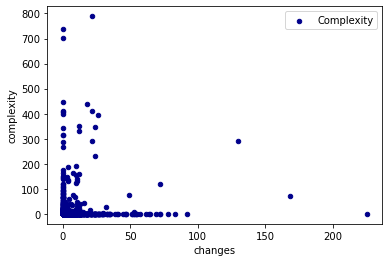

In [8]:
class_hotspots.plot.scatter(x='changes', y='complexity', color='DarkBlue', label='Complexity');